# Analyse des dialogues dans l'Avare de Molière

Auteur : Emile Pierret

Nous proposons d'étudier la part de dialogue de chacun des personnages de l'Avare de Molière.

In [130]:
%matplotlib inline
import pylab as plt
import matplotlib.patches as mpatches
import numpy as np

#Version numpy : 1.15.2
#Version matplotlib  : 2.2.3
#python 3.6.4

## 1. Etude des données

Le texte utilisé a été télécharger au lien suivant: http://dramacode.github.io/markdown/moliere_avare.txt, le 1er avril 2023 à 14h09. Il est disponible sur le git, au nom de "moliere_avare.txt"

In [133]:
fichier = open("moliere_avare.txt", "r")

In [135]:
lignes = fichier.readlines()

In [136]:
k = 0
while lignes[k] != '# ACTEURS.\n' :
    k +=1

In [137]:
lignes[k]

'# ACTEURS.\n'

In [138]:
for k in range(19,33) :
    print(lignes[k])

 – Harpagon, Père de Cléante et d'Élise, et Amoureux de Mariane.

 – Cléante, Fils d'Harpagon, Amant de Mariane.

 – Élise, Fille d'Harpagon, Amante de Valère.

 – Valère, Fils d'Anselme, et Amant d'Élise.

 – Mariane, Amante de Cléante, et aimée d'Harpagon.

 – Anselme, Père de Valère et de Mariane.

 – Frosine, Femme d'Intrigue.

 – Maitre Simon, Courtier.

 – Maitre Jacques, Cuisinier et Cocher d'Harpagon.

 – La Flèche, Valet de Cléante.

 – Dame Claude, Servante d'Harpagon.

 – Brindavoine, laquais d'Harpagon.

 – La Merluche, laquais d'Harpagon.

 – Le commissaire, et son clerc.



In [228]:
#Vérification structure du texte
for k in range(34,len(lignes)) :
    l = lignes[k]
    if l[:3] == '###' :
        scène_courante += 1
        dico_scènes[scène_courante]= {}
        for perso in persos :
            dico_scènes[scène_courante][perso] = 0
    elif l[:2] == '##' :
        if acte_courant >= 1 :
            dico_acte[acte_courant] = dico_scènes
        scène_courante = 0
        acte_courant += 1
        dico_scènes = {}
    if l in persos :
        Nombre_repliques[l] += 1
        dico_scènes[scène_courante][l] += 1
        Nombre_mots[l] += len(lignes[k+1].split()) #problème ponctuation
        if not (acte_courant in Nombre_actes[l]) :
            Nombre_actes[l].append(acte_courant)
dico_acte[acte_courant] = dico_scènes


In [139]:
persos = []
for k in range(19,33) :
    l = lignes[k]
    i = 3
    perso = ""
    while l[i] != "," :
        perso += l[i]
        i+=1
    persos.append("    "+perso.upper()+".\n")
print(persos)
persos[7] = '    MAÎTRE SIMON.\n'
persos[8] = '    MAÎTRE JACQUES.\n'
Nombre_repliques = {}
for perso in persos :
    Nombre_repliques[perso] = 0

Nombre_mots = {}
for perso in persos :
    Nombre_mots[perso] = 0

Nombre_scènes = {}
for perso in persos :
    Nombre_scènes[perso] = 0

Nombre_actes = {}
for perso in persos :
    Nombre_actes[perso] = []

['    HARPAGON.\n', '    CLÉANTE.\n', '    ÉLISE.\n', '    VALÈRE.\n', '    MARIANE.\n', '    ANSELME.\n', '    FROSINE.\n', '    MAITRE SIMON.\n', '    MAITRE JACQUES.\n', '    LA FLÈCHE.\n', '    DAME CLAUDE.\n', '    BRINDAVOINE.\n', '    LA MERLUCHE.\n', '    LE COMMISSAIRE.\n']


In [140]:
dico_acte = {}
acte_courant = 0
for k in range(34,len(lignes)) :
    l = lignes[k]
    if l[:3] == '###' :
        scène_courante += 1
        dico_scènes[scène_courante]= {}
        for perso in persos :
            dico_scènes[scène_courante][perso] = 0
    elif l[:2] == '##' :
        if acte_courant >= 1 :
            dico_acte[acte_courant] = dico_scènes
        scène_courante = 0
        acte_courant += 1
        dico_scènes = {}
    if l in persos :
        Nombre_repliques[l] += 1
        dico_scènes[scène_courante][l] += 1
        Nombre_mots[l] += len(lignes[k+1].split()) #problème ponctuation
        if not (acte_courant in Nombre_actes[l]) :
            Nombre_actes[l].append(acte_courant)
dico_acte[acte_courant] = dico_scènes

In [142]:
dict(sorted(Nombre_mots.items(), key=lambda item:item[1]))

{'    DAME CLAUDE.\n': 0,
 '    BRINDAVOINE.\n': 38,
 '    LA MERLUCHE.\n': 49,
 '    MAÎTRE SIMON.\n': 186,
 '    LE COMMISSAIRE.\n': 281,
 '    ANSELME.\n': 488,
 '    MARIANE.\n': 854,
 '    ÉLISE.\n': 893,
 '    MAÎTRE JACQUES.\n': 1341,
 '    LA FLÈCHE.\n': 1419,
 '    FROSINE.\n': 2033,
 '    VALÈRE.\n': 2532,
 '    CLÉANTE.\n': 3172,
 '    HARPAGON.\n': 5179}

In [143]:
dict(sorted(Nombre_repliques.items(), key=lambda item:item[1]))

{'    DAME CLAUDE.\n': 0,
 '    BRINDAVOINE.\n': 3,
 '    MAÎTRE SIMON.\n': 5,
 '    LA MERLUCHE.\n': 5,
 '    LE COMMISSAIRE.\n': 17,
 '    ANSELME.\n': 20,
 '    MARIANE.\n': 27,
 '    ÉLISE.\n': 50,
 '    FROSINE.\n': 59,
 '    LA FLÈCHE.\n': 64,
 '    MAÎTRE JACQUES.\n': 83,
 '    VALÈRE.\n': 99,
 '    CLÉANTE.\n': 160,
 '    HARPAGON.\n': 344}

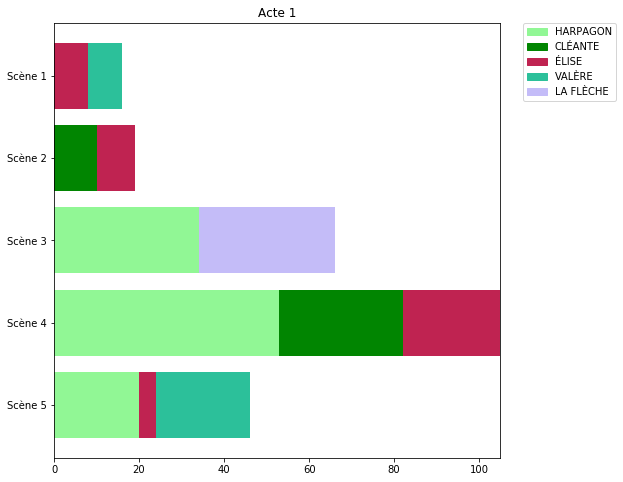

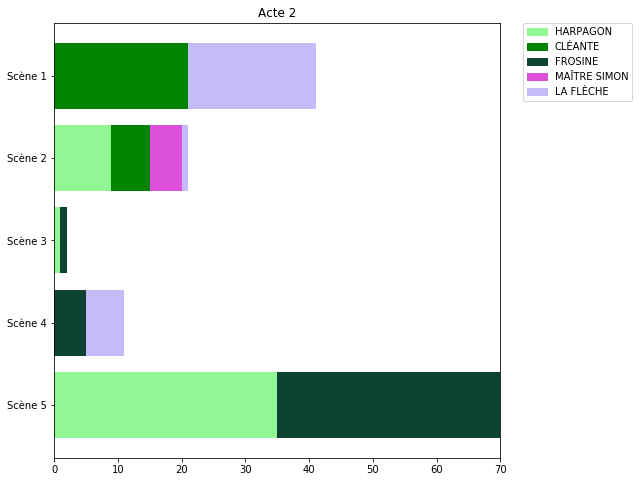

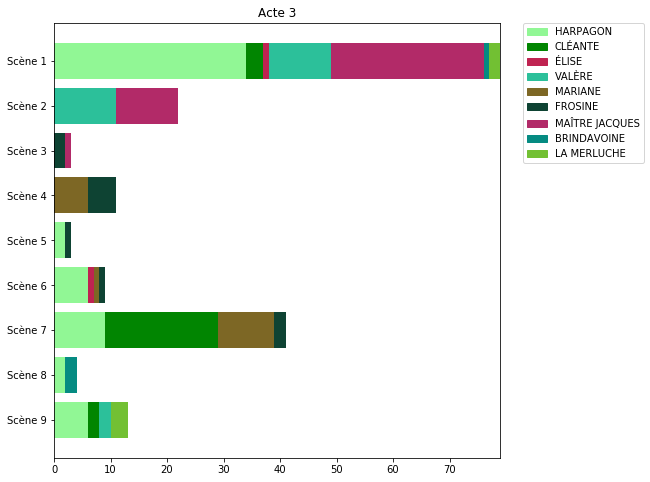

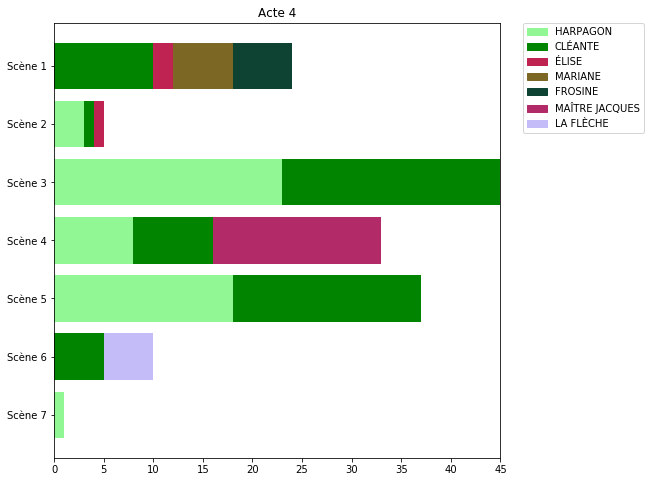

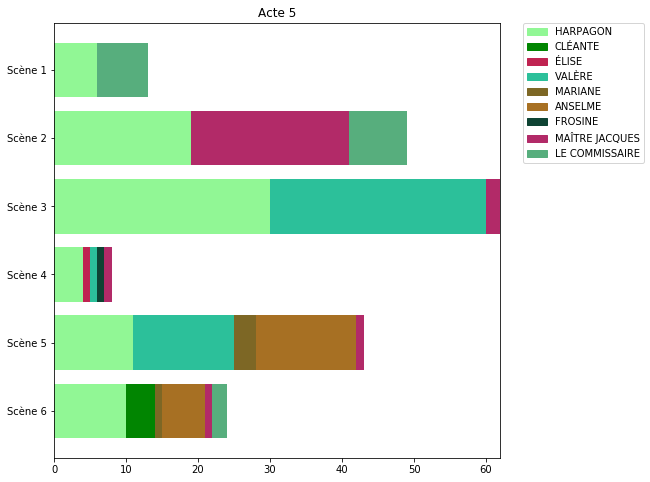

In [221]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


for acte in range(1,6) :
    plt.figure(figsize=(8,8))
    x = np.zeros((len(dico_acte[acte]),len(persos)))
    labels = persos
    for scene in range(1,len(dico_acte[acte])+1) :
        for l,perso in enumerate(persos) :
                x[scene-1,l] += dico_acte[acte][scene][perso]
    plt.title('Acte ' + str(acte))
    #plt.bar(labels,x)
    width = 1/2  # épaisseur de chaque bâton
    # Création du diagramme en bâtons (bâtons côte à côte)
    for scene in range(1,len(dico_acte[acte])+1) :
        bt = 0
        for l,perso in enumerate(persos) :
            plt.barh(-scene, x[scene-1,l],left = bt,color=colors[l])
            bt += x[scene-1,l]
    plt.yticks(-np.arange(scene)-1, np.array(["Scène "+str(k) for k in range(1,scene+1)]))
    patches = []
    for l,perso in enumerate(persos):
        if acte in Nombre_actes[perso] :
            patches.append(mpatches.Patch(color=colors[l], label=perso[4:-2]))
    plt.legend(handles=patches,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)